**Import necessary libraries and load the dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D://Test//Project//dataset.csv")  
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True)

In [3]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
df.isnull().sum()

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

 1. Seasonal Demand Trends

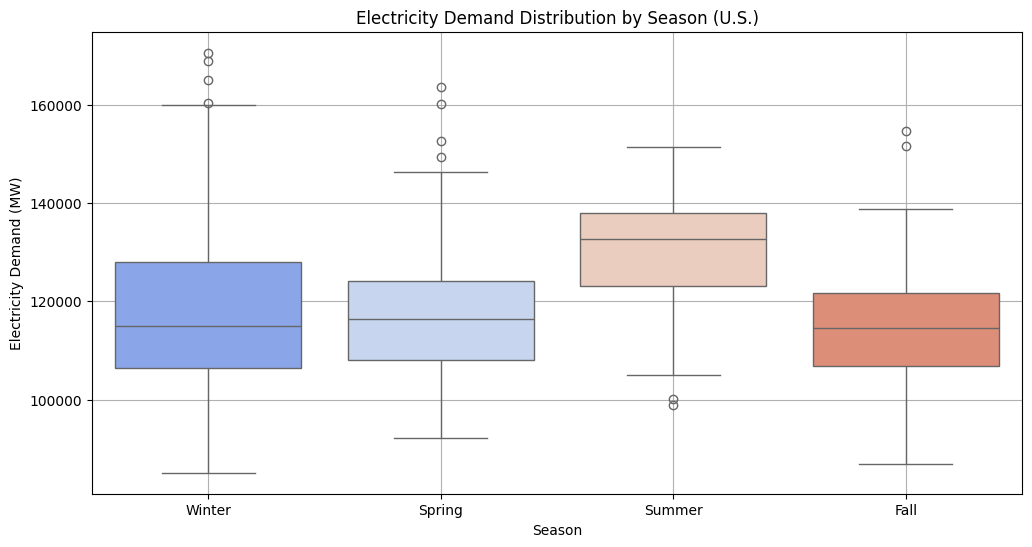

In [4]:

df.index = pd.to_datetime(df.index)

df['month'] = df.index.month

df['season'] = df['month'].apply(lambda x: 
    'Winter' if x in [12, 1, 2] else 
    'Spring' if x in [3, 4, 5] else 
    'Summer' if x in [6, 7, 8] else 
    'Fall'
)

plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='demand',hue='season', data=df, palette="coolwarm", order=["Winter", "Spring", "Summer", "Fall"])
plt.title("Electricity Demand Distribution by Season (U.S.)")
plt.xlabel("Season")
plt.ylabel("Electricity Demand (MW)")
plt.grid(True)
plt.show()


**The visualization shows a clear peak in electricity demand during the Summer months (June-August) compared to other seasons. This suggests increased usage of air conditioning during hotter periods. A secondary peak is likely observed in Winter (December-February), indicating increased heating demand. The transition periods of Spring and Fall show relatively lower and stable demand, implying less reliance on temperature-dependent appliances.**

2. Demand During School Days vs Holidays

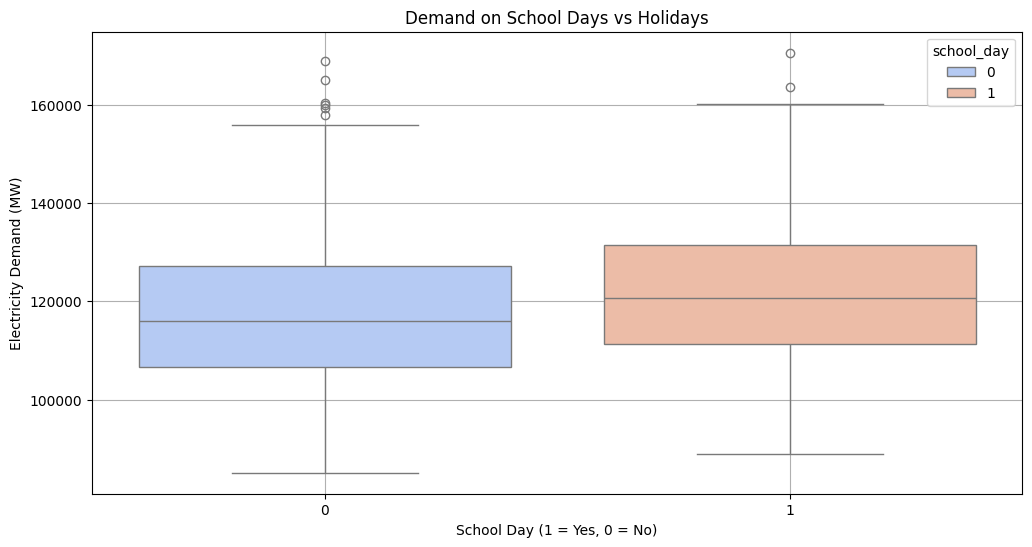

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='school_day', y='demand', hue='school_day', data=df, palette="coolwarm")
plt.title("Demand on School Days vs Holidays")
plt.xlabel("School Day (1 = Yes, 0 = No)")
plt.ylabel("Electricity Demand (MW)")
plt.grid(True)
plt.show()

**The data indicates that electricity demand is slightly higher during school days compared to holidays. This could be attributed to the energy consumption of schools, offices, and related businesses A noticeable drop in demand is expected during extended holiday periods like Christmas or summer breaks.**


# 3. Yearly Demand Trends


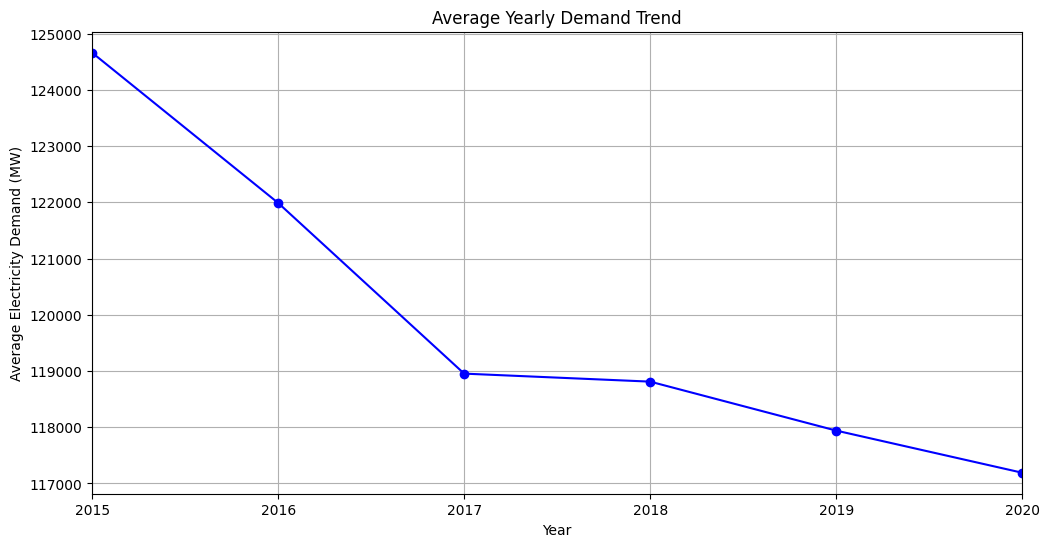

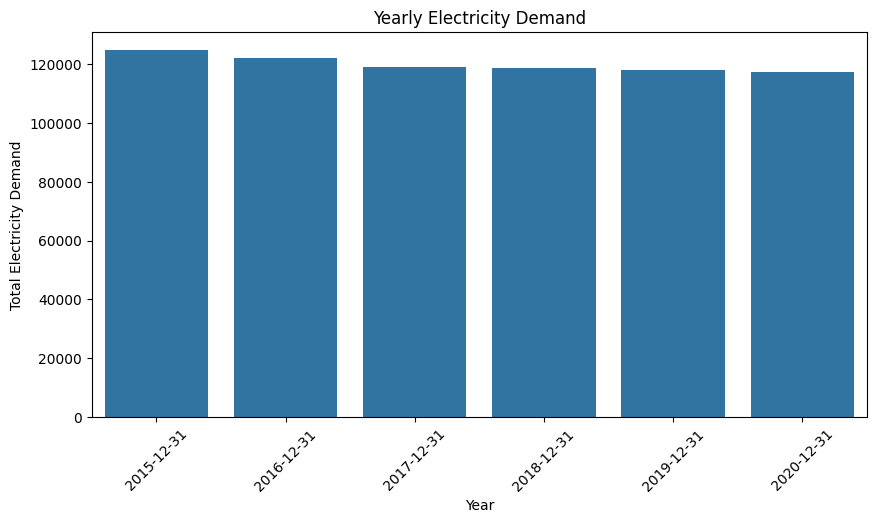

In [6]:
df['year'] = df.index.year
yearly_demand = df.resample('YE')['demand'].mean()

plt.figure(figsize=(12, 6))
yearly_demand.plot(color="blue", linestyle="solid", marker="o")
plt.title("Average Yearly Demand Trend")
plt.xlabel("Year")
plt.ylabel("Average Electricity Demand (MW)")
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_demand.index, y=yearly_demand.values)
plt.title("Yearly Electricity Demand")
plt.xlabel("Year")
plt.ylabel("Total Electricity Demand")
plt.xticks(rotation=45)  
plt.show()


Electricity Demand over Time

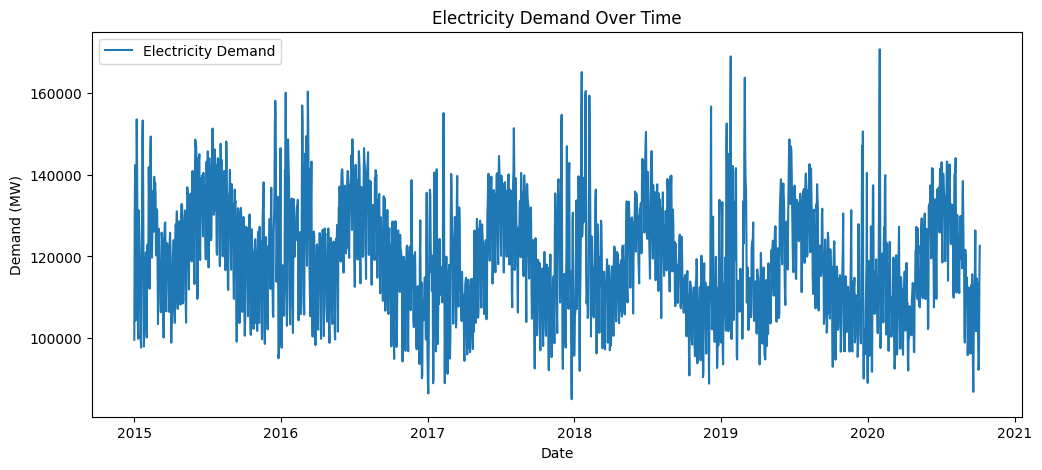

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["demand"], label="Electricity Demand")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.title("Electricity Demand Over Time")
plt.legend()
plt.show()


Impact of temperature on electricity Demand

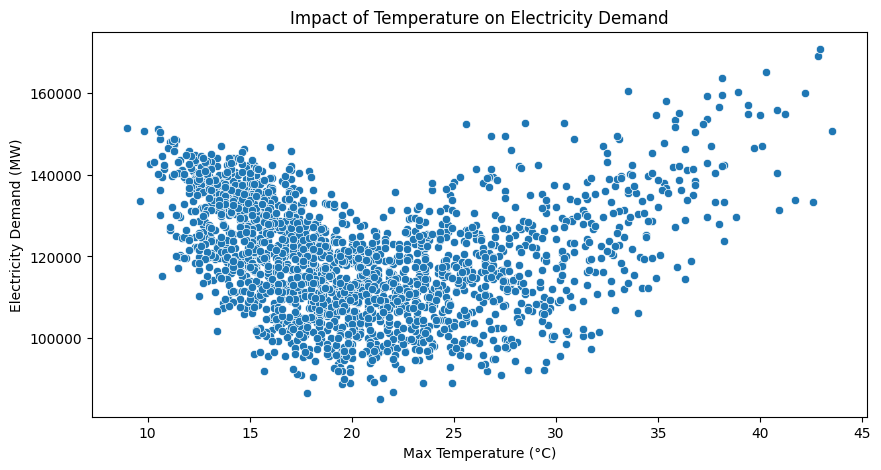

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["max_temperature"], y=df["demand"])
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Electricity Demand (MW)")
plt.title("Impact of Temperature on Electricity Demand")
plt.show()



As temperatures rise above a certain threshold (around 20°C-25°C), there's a noticeable increase in electricity demand, likely due to increased air conditioning usage. The relationship might become stronger at higher temperatures, indicating a higher sensitivity to extreme heat. There might also be a point at very high temperatures where demand plateaus.

Impact of Solar exposure on Electricity Demand

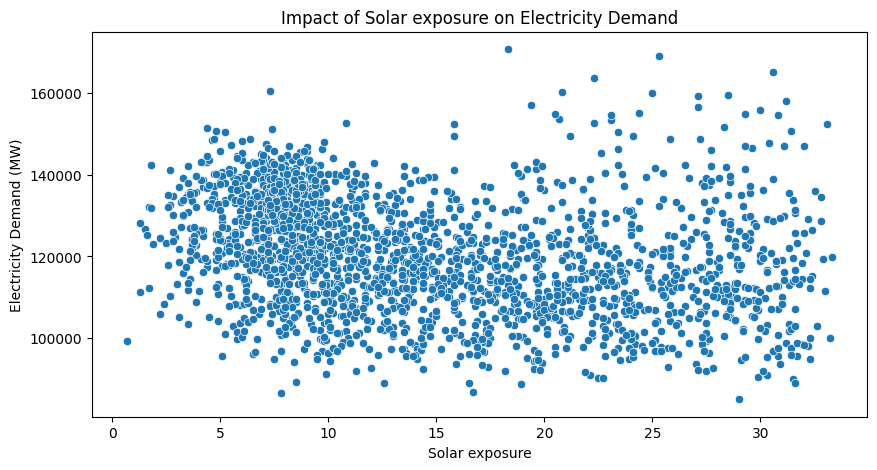

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["solar_exposure"], y=df["demand"])
plt.xlabel("Solar exposure")
plt.ylabel("Electricity Demand (MW)")
plt.title("Impact of Solar exposure on Electricity Demand")
plt.show()



**High solar exposure could reduce electricity demand during the day due to solar panel generation, but might increase demand in the evening as people switch back to grid power.**

Impact of Rainfall on Electricity Demand

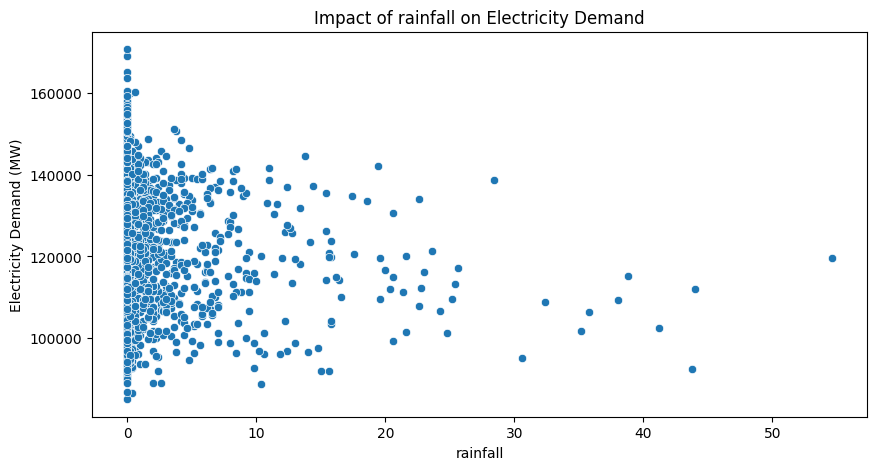

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["rainfall"], y=df["demand"])
plt.xlabel("rainfall")
plt.ylabel("Electricity Demand (MW)")
plt.title("Impact of rainfall on Electricity Demand")
plt.show()



**Rainfall might reduce demand slightly due to cooler temperatures and reduced outdoor activities.**

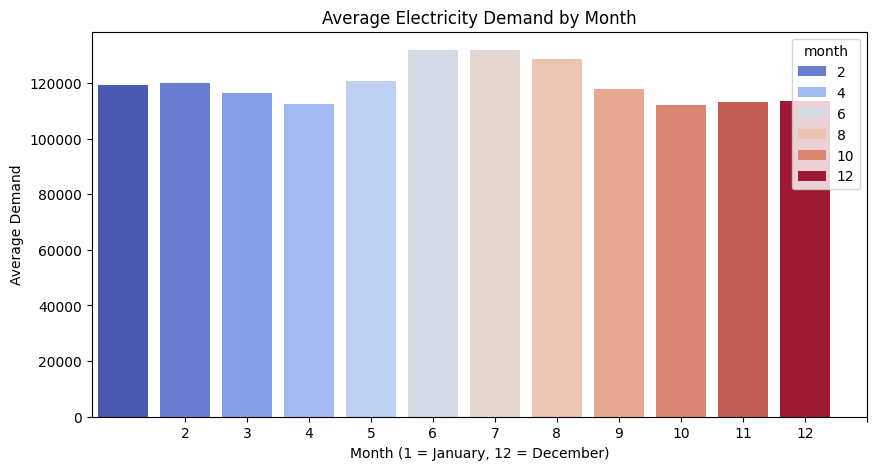

In [10]:

df["month"] = df.index.month


monthly_avg_demand = df.groupby("month")["demand"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg_demand.index, y=monthly_avg_demand.values,hue=monthly_avg_demand.index, palette="coolwarm")
plt.title("Average Electricity Demand by Month")
plt.xlabel("Month (1 = January, 12 = December)")
plt.ylabel("Average Demand")
plt.xticks(range(1, 13))  
plt.show()


July and August have the highest average demand, while Spring and Fall months have the lowest.The average electricity demand by month clearly shows that July and August have the highest average demand, indicating peak summer consumption. There is likely a second peak is observed in January and December, likely associated with winter heating. The lowest demand typically occurs in Spring and Fall months like April, May, September, and October, representing periods of milder weather with reduced reliance on heating and cooling.

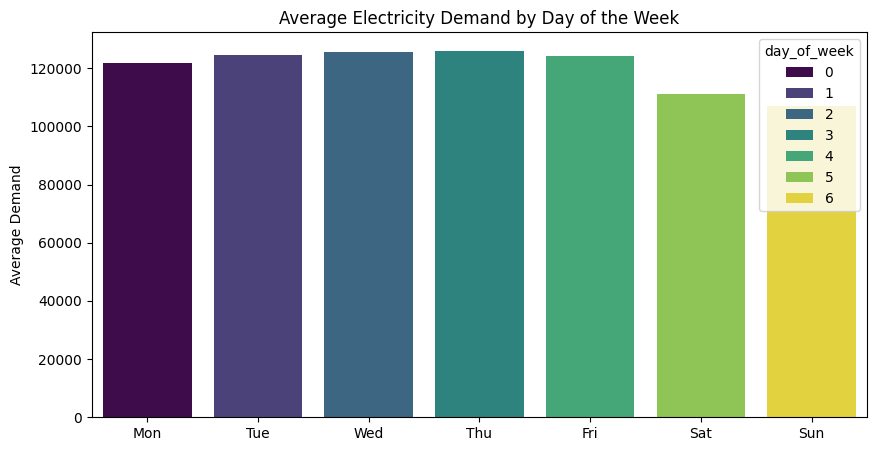

In [11]:

df["day_of_week"] = df.index.dayofweek

weekly_avg_demand = df.groupby("day_of_week")["demand"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_avg_demand.index, y=weekly_avg_demand.values,hue=weekly_avg_demand.index, palette="viridis")
plt.title("Average Electricity Demand by Day of the Week")
plt.xlabel("")
plt.ylabel("Average Demand")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


The average electricity demand by day of the week reveals a consistent pattern. Electricity demand is generally higher on weekdays (Monday to Friday) compared to weekends (Saturday and Sunday). The demand is likely highest during midweek (Tuesday - Thursday) due to full business operations, and lowest on Sunday.

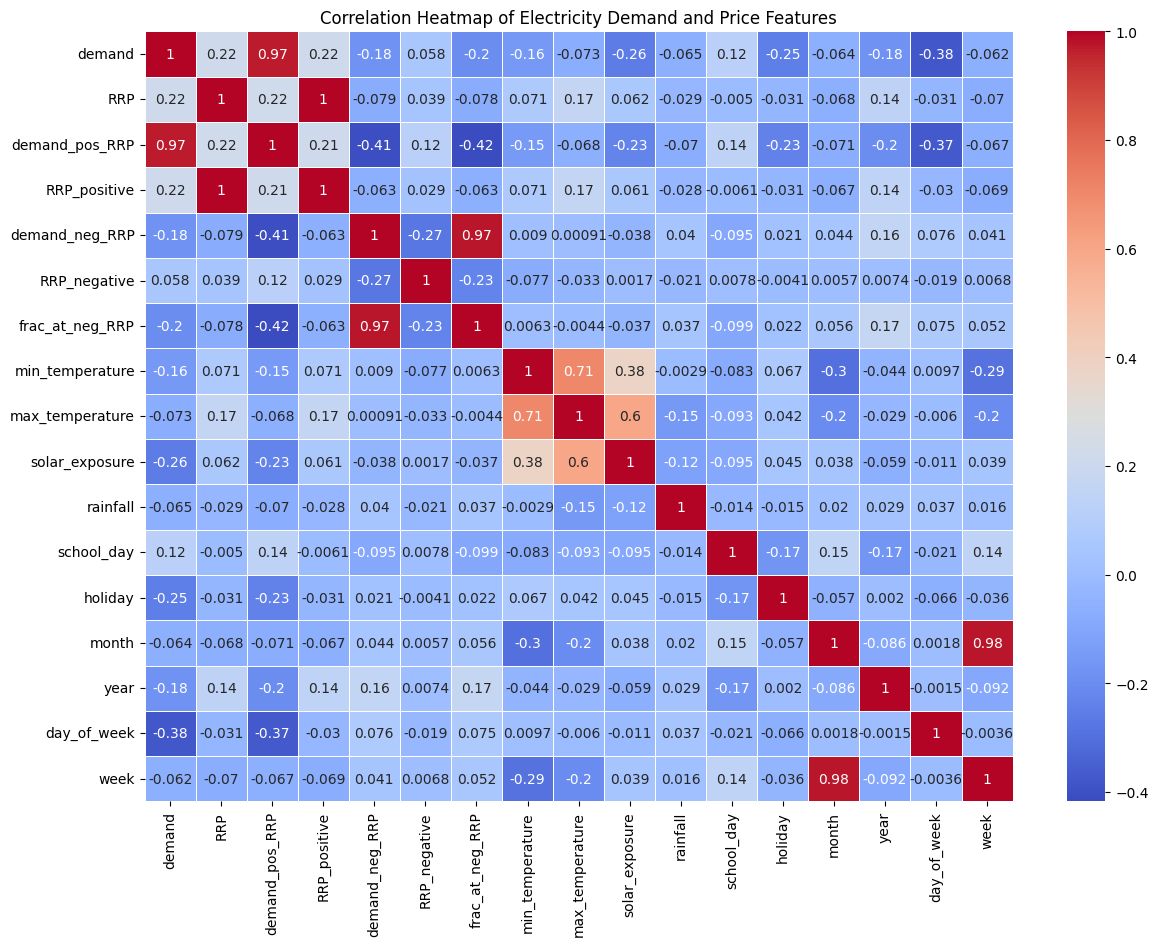

In [12]:

df['day_of_week'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday
df['month'] = df.index.month
df['week'] = df.index.isocalendar().week 

plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Electricity Demand and Price Features")
plt.show()





Strong Positive Correlations: Highlight pairs of variables with strong positive correlations and explain the likely reasons behind them (e.g., "The strong positive correlation between max_temperature and demand suggests that air conditioning usage is a major driver of electricity demand in this region.").

Strong Negative Correlations: Discuss any strong negative correlations and provide possible explanations (e.g., "The negative correlation between holiday and demand indicates that electricity consumption is significantly lower on holidays due to business closures.").

Weak Correlations: Note any variables that show weak or no correlation with demand. This suggests that these factors have a limited direct impact on electricity consumption.

